# Recognition of clothing items (fashionMNIST) with Convolutional Neural Networks

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [5]:
# Scale the pixel values to a range of 0 to 1 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

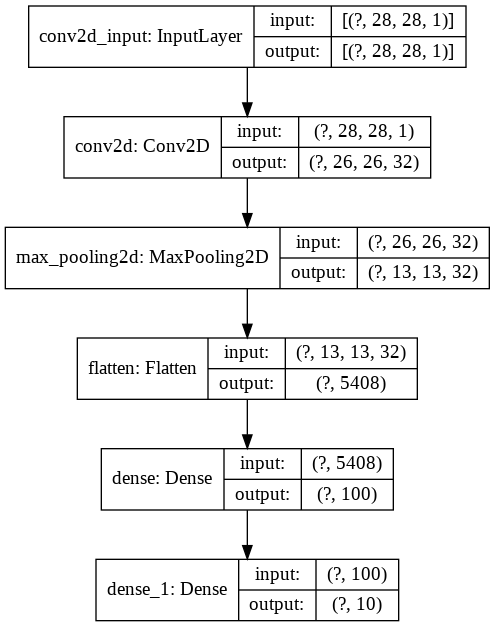

In [14]:
plot_model(model, to_file='fmnistcnn.png',show_shapes=True, show_layer_names=True)

In [17]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0336 - accuracy: 0.9878
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0282 - accuracy: 0.9899
Epoch 3/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0259 - accuracy: 0.9911
Epoch 5/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 6/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 7/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 8/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0193 - accuracy: 0.9932
Epoch 9/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0181 - accuracy: 0.9938
Epoch 10/15
1875/1875 [==============================] - 33s 18m

In [19]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 2s 8ms/step - loss: 0.6964 - accuracy: 0.9069
Train accuracy: 0.99433
Train loss: 0
Test accuracy: 0.9069
Test loss: 0.696


KeyError: ignored

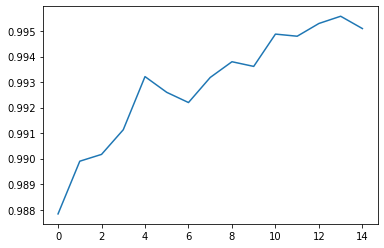

In [18]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()